# Iniciación en Python con Aplicaciones en Aceración (module 03)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r
from scipy.stats import kurtosis
import src.ev as ev

# 1. Contexto Metalúrgico

La estadística de valores extremos es una rama de la estadística que se interesa en estimar la probabilidad de que ocurra un evento más extremo que cualquier evento observado previamente.

Dentro del contexto de calidad metalúrgica y de caracterización de materiales, un evento extremo podría ser la probabilidad de que una característica microstructural en un material (e.g., inclusiones, hojuelas de grafito, precipitados, porosidades, cavidades, etc.) sea más grande que a un tamaño crítico. En este contexto, la Distribución (Gumbel) de Valores Extremos se utiliza para estimar las probabilidades.

El objetivo es proveer una guía práctica para realizar análisis de características microestructurales de materiales, utilizando librerías de Python. Este notebook se enfoca en la
**Aplicación para caracterizar poblaciones de inclusiones no metálicas en aceros**.



Al final de este Notebook, se provee una sección con  **Referencias**.

**Inclusión de alumina:**

[[Castro et al. 2015](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)].
![alt text](images/alumina1.png "Alumina")

**Inclusión compleja con MgO (periclasa):**

La imagen debajo muestra que las inclusiones no necesariamente son compuestos puros.

- La fase obscura es 93% MgO.
- La fase clara es un aluminato de calcio.

[[Castro et al. 2015](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)].
![alt text](images/periclase1.png "Periclase")

# 2. Ejemplo de aplicación

En este ejemplo práctico se procesan datos de mediciones de inclusiones no metálicas en aceros desoxidados al silicio para aplicaciones en muelles automotrices [[Huazano et al. 2022]](https://doi.org/10.3390/ma15217681). La metodología de medición se basó  en la norma [ASTM E2283](https://www.astm.org/e2283-08r19.html).

## 2.1 Cargar datos

In [3]:
df = pd.read_csv(os.path.join("datasets", "huazano2022.csv"))
df

,Inclusion,Heat1,Heat2,Heat3,Heat4,Heat5,Heat6
0,1,7.5,10.4,16.7,20.20,16.7,24.8
1,2,8.1,11.0,19.0,20.80,21.4,36.9
2,3,8.7,11.5,19.6,24.80,25.4,39.2
3,4,10.4,11.5,20.2,26.00,26.0,43.9
4,5,11.6,12.1,20.2,31.20,26.5,57.1
5,6,12.1,12.7,20.8,31.70,31.2,60.6
6,7,12.1,12.7,20.8,31.70,31.7,64.0
7,8,12.1,13.3,21.4,32.90,34.0,64.0
8,9,12.7,13.3,22.5,32.90,34.6,64.6
9,10,14.4,13.3,23.1,32.90,35.2,65.8


## 2.2 Procesamiento de datos

### 2.2.1 Colada individual

Gumbel distribution params. (*ML est.)
lambda: 15.4067
delta : 7.6391



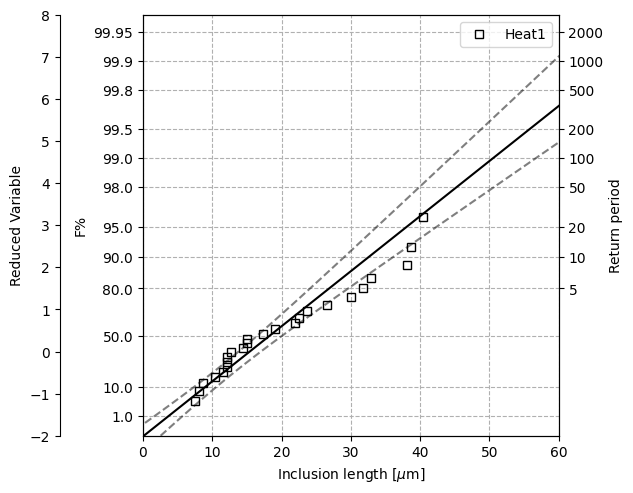

In [4]:
fig, ax = ev.makeInclusionsPlotTemplate(ymin=-2, ymax=8)
heat = "Heat1"
ev.plotInclusions(ax, df[heat], label=heat, marker='s')
ax.set(
    xlim = (0, 60),
    xlabel = r'Inclusion length [$\mu$m]',
)
plt.show()

### 2.2.2 Múltiples coladas de forma simultanea

Gumbel distribution params. (*ML est.)
lambda: 15.4067
delta : 7.6391

Gumbel distribution params. (*ML est.)
lambda: 13.8175
delta : 2.9553

Gumbel distribution params. (*ML est.)
lambda: 24.0976
delta : 6.5036

Gumbel distribution params. (*ML est.)
lambda: 31.6501
delta : 7.8397

Gumbel distribution params. (*ML est.)
lambda: 35.5542
delta : 14.1022

Gumbel distribution params. (*ML est.)
lambda: 57.5134
delta : 18.0143



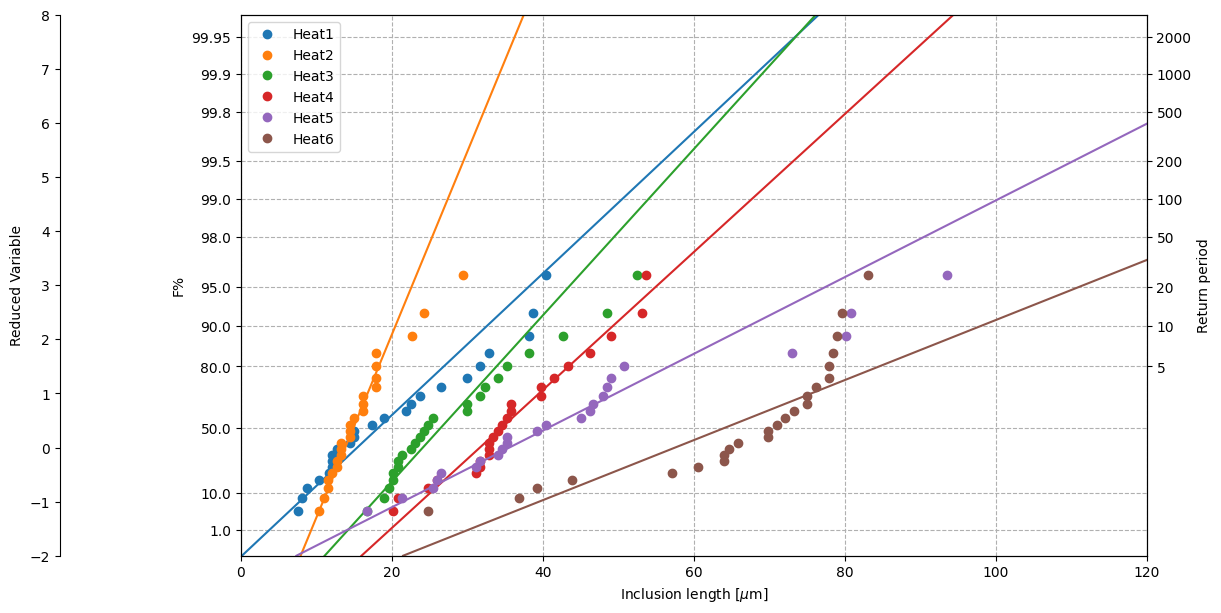

In [5]:
heats = df.columns[1:]

fig, ax = ev.makeInclusionsPlotTemplate(figsize=(12, 6), ymin=-2, ymax=8)


for ii, heat in enumerate(heats):
    color="".join(["C",str(ii)])
    ev.plotInclusions(
        ax, 
        df[heat], 
        method="ml", 
        ci=False,
        marker="o", 
        color=color,
        mfc=None,
        label=heat
)
ax.set(
    xlim = (0, 120),
    xlabel = r'Inclusion length [$\mu$m]',
)
plt.show()

La curtosis en exceso de la distribución Gumbel es siempre la misma, $\frac{12}{5}$. Esto se corrobora mediante muestreo de Monte-Carlo:

In [20]:
heats = df.columns[1:]

print(f"In Gumbel distribution excess kurtosis = {12/5}\n")

for i, heat in enumerate(heats):
    loc, scale = gumbel_r.fit(df[heat])
    data = gumbel_r.rvs(loc=loc, scale=scale, size=1000000)
    kur = kurtosis(data, fisher=True)
    print(f"Heat {i+1}, loc={loc:.4f}, scale={scale:.4f}")
    print(f"   excess kurtosis={kur:.2f}")


In Gumbel distribution excess kurtosis = 2.4

Heat 1, loc=15.4067, scale=7.6391
   excess kurtosis=2.42
Heat 2, loc=13.8175, scale=2.9553
   excess kurtosis=2.37
Heat 3, loc=24.0976, scale=6.5036
   excess kurtosis=2.36
Heat 4, loc=31.6501, scale=7.8397
   excess kurtosis=2.34
Heat 5, loc=35.5542, scale=14.1022
   excess kurtosis=2.39
Heat 6, loc=57.5134, scale=18.0143
   excess kurtosis=2.44


# Referencias

**Artículos:**

[[Castro et al. 2015](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)]

Castro-Cedeño, E. I., Herrera-Trejo, M., Castro-Román, M., Castro-Uresti, F., & López-Cornejo, M. (2016).   
Evaluation of steel cleanliness in a steel deoxidized using Al.   
Metallurgical and Materials Transactions B, 47(3), 1613-1625.

[[Huazano et al. 2022]](https://doi.org/10.3390/ma15217681)

Huazano-Estrada, P., Herrera-Trejo, M., Castro-Román, M. d. J., & Ruiz-Mondragón, J. (2022).  
Characterization of Inclusion Size Distributions in Steel Wire Rods.  
Materials, 15(21), 7681.

**Documentación Scipy:**

[scipy.stats.gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html)


**Libros:**

[Y. Murakami, Metal Fatigue (2002)](https://www.sciencedirect.com/book/9780080440644/metal-fatigue)

[Y. Murakami, Metal Fatigue 2nd. ed (2019)](https://www.sciencedirect.com/book/9780128138762/metal-fatigue)



**Normas ASTM:**

[ASTM E2283: Standard Practice for Extreme Value Analysis of Nonmetallic Inclusions in Steel and Other Microstructural Features](https://www.astm.org/e2283-08r19.html)



**Web:**

[Gumbel Distribution](https://en.wikipedia.org/wiki/Gumbel_distribution)

[Extreme Value Type I Distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366g.htm)




